In [2]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original', data_home=".")

X = mnist.data / 255
y = mnist.target


/Users/maeda/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/maeda/miniconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


この画像データのラベルは8です


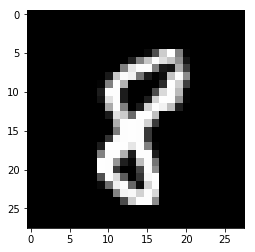

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

idx = int(np.random.rand() * len(X))
plt.imshow(X[idx].reshape(28,28), cmap='gray')
print('この画像データのラベルは{:.0f}です'.format(y[idx]))

In [36]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)



In [7]:
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28 * 28 * 1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))
print(model)


Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [8]:
from torch import optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [9]:
def train(epoch):
    model.train()
    for data, targets in loader_train:
        optimizer.zero_grad()
        outputs = model(data)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()

    print('epoch{}:終了\n'.format(epoch))


In [19]:
def test():
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, targets in loader_test:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            
            v = targets.data.view_as(predicted)
            print(v)
            a = predicted.eq(v)
            correct += a.sum()
    data_num = len(loader_test.dataset)
    print('\nテストデータの正解率：{}/{} ({;.0f)%\n'.format(correct, data_num, 100. * correct / data_num))



In [37]:
test()


テストデータの正解率: 9588/10000 (95%)



In [38]:
for epoch in range(3):
    train(epoch)

test()

epoch0:終了



epoch1:終了



epoch2:終了


テストデータの正解率: 9598/10000 (95%)



予測結果は9
この画像データの正解ラベルは9です


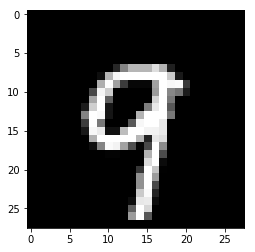

In [41]:
index = 2017

model.eval()
data = X_test[index]
output = model(data)
_, predicted = torch.max(output.data, 0)

print("予測結果は{}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')

print("この画像データの正解ラベルは{:.0f}です".format(y_test[index]))
